# Macro Problem set 2
## Question 1(d)

I made several adjustments to the original code from DemArk. 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Some initial setup

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))


from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from copy  import deepcopy

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [35]:
# Define a function that plots something given some inputs

def plot1(Epsilon, DiscFac, PopGrowth, YearsPerGeneration, kMax, Initialk):
    '''Inputs:
        Epsilon: Elasticity of output with respect to capital/labour ratio
        DiscFac: One period discount factor
        YearPerGeneration: No. of years per generation
        PopGrowth: Gross growth rate of population in one period'''
    
    # Define some parameters
    Beta = DiscFac**YearsPerGeneration
    xi = (PopGrowth[0]**YearsPerGeneration,PopGrowth[1]**YearsPerGeneration) 
    Q = ((1-Epsilon)*(Beta/(1+Beta))/xi[0],(1-Epsilon)*(Beta/(1+Beta))/xi[1])
    kBar = (Q[0]**(1/(1-Epsilon)), Q[1]**(1/(1-Epsilon)))
    
    # Plot the OLG capital accumulation curve and 45 deg line
    plt.figure(figsize=(9,6))
    kt_range = np.linspace(0, kMax, 1000)
    
    ktp1 = Q[0]*kt_range**Epsilon
    ktp2 = Q[1]*kt_range**Epsilon
    plt.plot(kt_range, ktp1, 'b-', label='Capital accumulation curve'+" PopGrowth="+str(PopGrowth[0]))
    plt.plot(kt_range, ktp2, 'y-', label='Capital accumulation curve'+" PopGrowth="+str(PopGrowth[1]))
    plt.plot(kt_range, kt_range, 'k-', label='45 Degree line')
    
    
    
    # Plot kbar and initial k
    plt.plot(kBar[0], kBar[0], 'ro', label=" PopGrowth=1.01")
    plt.plot(kBar[1], kBar[1], 'ro', label=" PopGrowth=1.03")
   # plt.plot(Initialk, Initialk, 'co', label = 'Initialk')
    
    

    
    
    plt.arrow(kBar[0], kBar[0], 0, Q[1]*kBar[0]**Epsilon-kBar[0],
                  length_includes_head=True,
                  lw=0.01,
                  width=0.0005,
                  color='black',
                  edgecolor=None)
    plt.arrow(kBar[0], Q[1]*kBar[0]**Epsilon, Q[1]*kBar[0]**Epsilon-kBar[0],0, 
                  length_includes_head=True,
                  lw=0.01,
                  width=0.0005,
                  color='black',
                  edgecolor=None)
        
    plt.legend()
    plt.xlim(0 ,kMax)
    plt.ylim(0, kMax)
    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.show()
    return None

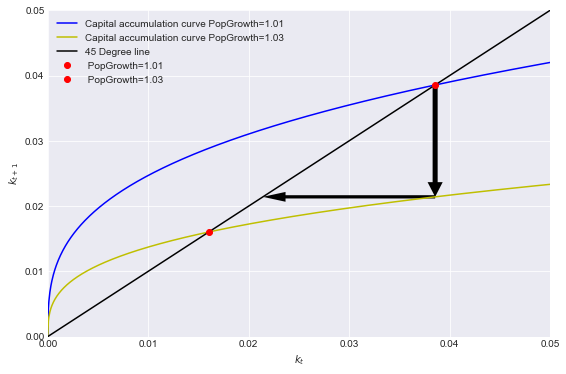

In [36]:
plot1(0.33, 0.96, (1.01,1.03), 30, 0.05, 0.01)

